# Agrupamento de empresas similares

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn
srn.set()
%matplotlib inline

In [2]:
import pickle

### Base de dados

In [3]:
with open('bases_classificacao.pkl', 'rb') as f:
    dataset, dataset_original, X, y, empresa, scaler = pickle.load(f)

In [5]:
print(dataset_original.shape)
dataset_original.head()

(347, 24)


,Situação,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA desconctado,VPA,P/L,P/L descontado,...,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro
0,ruim,energia eletrica,1.334627e+09,4.391657e+09,15969.0,alerta,0.56,36.03,24.71,24.71,...,20.66,2012.0,1567.00,0.860000,49.000000,11.000000,3.94,4508.0,0.12,102.0
1,boa,energia eletrica,1.519060e+10,1.021776e+10,18681.0,dividendos,0.18,0.80,14.92,14.92,...,37.00,1812.0,2459.00,1.720000,58.000000,15.000000,2.40,828.0,0.70,-52.0
2,ruim,energia eletrica,9.465319e+07,8.565319e+07,1898.0,alerta,0.15,2.07,31.55,31.55,...,25.00,48.0,-8.00,1.720811,30.548746,38.872065,1.24,8.0,1.13,4.0
3,ruim,energia eletrica,2.819886e+08,2.439886e+08,8.0,alerta,0.20,1.23,21.69,21.69,...,22.00,78.0,-31.00,0.040000,5.250000,23.000000,1.15,7.0,6.00,67.0
4,ruim,bancos,2.887665e+08,2.857665e+08,11290.0,crescimento moderado,0.60,10.42,5.65,5.65,...,6.00,721.0,-440.75,0.250000,30.548746,38.872065,1.01,6.0,0.50,0.0


In [6]:
print(dataset.shape)
dataset.head()

(347, 111)


,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,...,80,81,82,83,84,85,86,87,88,89
0,1.334627e+09,4.391657e+09,15969.0,0.56,36.03,24.71,24.71,0.38,-0.53,555.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.519060e+10,1.021776e+10,18681.0,0.18,0.80,14.92,14.92,3.39,22.00,703.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9.465319e+07,8.565319e+07,1898.0,0.15,2.07,31.55,31.55,2.42,-63.00,13.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.819886e+08,2.439886e+08,8.0,0.20,1.23,21.69,21.69,3.61,46.00,17.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.887665e+08,2.857665e+08,11290.0,0.60,10.42,5.65,5.65,0.32,116.00,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
X.shape, y.shape

((347, 111), (347,))

In [9]:
empresa

0                          aes elpa s.a 
1                         tiet aes tiete
2                          aflu afluente
3                        aflu afluente t
4                      rpad alfa holding
                     ...                
372                   whirlpool s.a whrl
373                 wilson sons ltd wson
374    wlm industria e comercia s.a sgas
375          zain participações s.a opzi
376                524 participações s.a
Name: Empresa, Length: 347, dtype: object

In [10]:
scaler

MinMaxScaler()

## Número de clusters

In [11]:
from sklearn.cluster import KMeans

In [20]:
wcss = [] # within cluster sum of squares
faixa = range(2, 21)
for i in faixa:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [22]:
#wcss

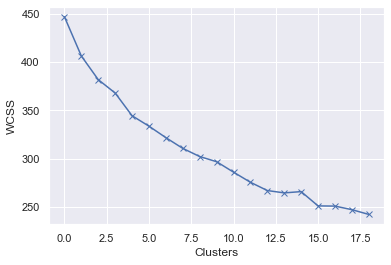

In [23]:
plt.plot(wcss, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

Ponto em que o valor do gráfico não tem uma queda tão acentuada --> **K = 7 clusters**

## Agrupamento k-means

In [29]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)
labels = kmeans.labels_
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([ 16,  48,  36,  25, 148,  54,  20], dtype=int64))

In [32]:
#kmeans.cluster_centers_

## Análise do agrupamento

In [35]:
centroides = pd.DataFrame(kmeans.cluster_centers_, columns=[dataset.columns])
centroides

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,...,80,81,82,83,84,85,86,87,88,89
0,0.004187,0.004618,0.002021,0.820442,0.204025,0.474203,0.252867,0.401291,0.883609,0.126915,...,8.673617e-19,8.673617e-19,8.673617e-19,4.336809e-19,4.336809e-19,1.000000e+00,-6.938894e-18,0.000000e+00,-1.387779e-17,8.673617e-19
1,0.092151,0.035921,0.012434,0.835668,0.204321,0.509163,0.257351,0.441675,0.888709,0.192410,...,2.602085e-18,2.602085e-18,2.602085e-18,1.301043e-18,2.083333e-02,1.110223e-16,-6.938894e-18,1.000000e+00,-1.387779e-17,2.602085e-18
2,0.042093,0.024764,0.056021,0.835878,0.204870,0.540062,0.282545,0.457471,0.890205,0.147694,...,1.734723e-18,1.734723e-18,2.777778e-02,2.777778e-02,8.673617e-19,0.000000e+00,-6.938894e-18,-5.551115e-17,1.000000e+00,1.734723e-18
3,0.016671,0.018382,0.005652,0.834145,0.204464,0.510562,0.250310,0.417361,0.885140,0.127368,...,-1.734723e-18,-1.734723e-18,-1.734723e-18,-8.673617e-19,-8.673617e-19,1.000000e+00,-1.387779e-17,-5.551115e-17,-2.775558e-17,-1.734723e-18
4,0.022784,0.023808,0.008669,0.831088,0.204039,0.504229,0.254339,0.414324,0.881613,0.128783,...,6.756757e-03,1.351351e-02,6.756757e-03,2.602085e-18,2.602085e-18,1.000000e+00,6.938894e-17,-1.665335e-16,1.387779e-16,5.204170e-18
5,0.005727,0.004986,0.001691,0.781648,0.212440,0.502822,0.248832,0.410031,0.870029,0.124451,...,1.734723e-18,1.734723e-18,1.734723e-18,8.673617e-19,8.673617e-19,1.000000e+00,-6.938894e-18,0.000000e+00,-1.387779e-17,1.734723e-18
6,0.027618,0.016554,0.006036,0.834653,0.204301,0.513683,0.263754,0.465557,0.888921,0.136044,...,5.000000e-02,-8.673617e-19,-8.673617e-19,-4.336809e-19,-4.336809e-19,-1.110223e-16,9.000000e-01,0.000000e+00,-2.775558e-17,1.000000e-01


In [37]:
centroides = scaler.inverse_transform(centroides)
centroides = pd.DataFrame(centroides, columns=[dataset.columns])
centroides

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,...,80,81,82,83,84,85,86,87,88,89
0,3.441646e+20,1.140886e+21,6.578178e+09,-13316.868500,1.959955e+05,-82609.061625,9343.382059,8.458606,-8.335800e+09,6.495257e+05,...,8.673617e-19,8.673617e-19,8.673617e-19,4.336809e-19,4.336809e-19,1.000000e+00,-6.938894e-18,0.000000e+00,-1.387779e-17,8.673617e-19
1,7.573987e+21,8.963434e+21,4.045322e+10,933.058944,2.993125e+05,21773.632711,16517.375945,74.241027,-8.175821e+08,2.660952e+07,...,2.602085e-18,2.602085e-18,2.602085e-18,1.301043e-18,2.083333e-02,1.110223e-16,-6.938894e-18,1.000000e+00,-1.387779e-17,2.602085e-18
2,3.459655e+21,6.175326e+21,1.822623e+11,1130.101133,4.913544e+05,114033.630267,56825.081496,99.972658,1.386853e+09,8.885850e+06,...,1.734723e-18,1.734723e-18,2.777778e-02,2.777778e-02,8.673617e-19,0.000000e+00,-6.938894e-18,-5.551115e-17,1.000000e+00,1.734723e-18
3,1.370198e+21,4.580522e+21,1.838926e+10,-491.777995,3.495171e+05,25951.617789,5252.642098,34.636260,-6.079326e+09,8.290602e+05,...,-1.734723e-18,-1.734723e-18,-1.734723e-18,-8.673617e-19,-8.673617e-19,1.000000e+00,-1.387779e-17,-5.551115e-17,-2.775558e-17,-1.734723e-18
4,1.872618e+21,5.936594e+21,2.820694e+10,-3352.990207,2.008236e+05,7043.283785,11699.209098,29.687877,-1.127816e+10,1.389867e+06,...,6.756757e-03,1.351351e-02,6.756757e-03,2.602085e-18,2.602085e-18,1.000000e+00,6.938894e-17,-1.665335e-16,1.387779e-16,5.204170e-18
5,4.706853e+20,1.232980e+21,5.502576e+09,-49626.084441,3.138841e+06,2841.322131,2887.821473,22.696296,-2.835324e+10,-3.270856e+05,...,1.734723e-18,1.734723e-18,1.734723e-18,8.673617e-19,8.673617e-19,1.000000e+00,-6.938894e-18,0.000000e+00,-1.387779e-17,1.734723e-18
6,2.269924e+21,4.123824e+21,1.964029e+10,-16.890814,2.924915e+05,35271.434426,26761.612472,113.143565,-5.048721e+08,4.268164e+06,...,5.000000e-02,-8.673617e-19,-8.673617e-19,-4.336809e-19,-4.336809e-19,-1.110223e-16,9.000000e-01,0.000000e+00,-2.775558e-17,1.000000e-01


In [39]:
dataset_cluster = pd.concat([empresa, pd.DataFrame({'cluster':labels})], axis=1)
dataset_cluster

,Empresa,cluster
0,aes elpa s.a,3.0
1,tiet aes tiete,2.0
2,aflu afluente,3.0
3,aflu afluente t,3.0
4,rpad alfa holding,1.0
...,...,...
297,NaN,5.0
311,NaN,4.0
332,NaN,4.0
333,NaN,4.0


In [40]:
dataset_cluster = pd.concat([dataset_original, pd.DataFrame({'cluster':labels})], axis=1)
dataset_cluster

,Situação,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA desconctado,VPA,P/L,P/L descontado,...,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro,cluster
0,ruim,energia eletrica,1.334627e+09,4.391657e+09,15969.0,alerta,0.56,36.03,24.71,24.71,...,2012.0,1567.00,0.860000,49.000000,11.000000,3.94,4508.0,0.12,102.0,3.0
1,boa,energia eletrica,1.519060e+10,1.021776e+10,18681.0,dividendos,0.18,0.80,14.92,14.92,...,1812.0,2459.00,1.720000,58.000000,15.000000,2.40,828.0,0.70,-52.0,2.0
2,ruim,energia eletrica,9.465319e+07,8.565319e+07,1898.0,alerta,0.15,2.07,31.55,31.55,...,48.0,-8.00,1.720811,30.548746,38.872065,1.24,8.0,1.13,4.0,3.0
3,ruim,energia eletrica,2.819886e+08,2.439886e+08,8.0,alerta,0.20,1.23,21.69,21.69,...,78.0,-31.00,0.040000,5.250000,23.000000,1.15,7.0,6.00,67.0,3.0
4,ruim,bancos,2.887665e+08,2.857665e+08,11290.0,crescimento moderado,0.60,10.42,5.65,5.65,...,721.0,-440.75,0.250000,30.548746,38.872065,1.01,6.0,0.50,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0


In [43]:
categoria_cluster = dataset_cluster.groupby(['Categoria', 'cluster'])['cluster'].count()
categoria_cluster

Categoria                 cluster
alerta                    0.0        13
                          1.0        26
                          2.0        22
                          3.0        20
                          4.0        95
                          5.0        36
                          6.0        15
crescimento               0.0         1
                          1.0         3
                          2.0         3
                          4.0         6
                          5.0         4
crescimento moderado      0.0         1
                          1.0        12
                          2.0         3
                          3.0         1
                          4.0        23
                          5.0         2
                          6.0         1
dividendos                1.0         4
                          2.0         6
                          3.0         4
                          4.0        11
                          5.0         4
      

## Visualização do agrupamento

## Exercício